In [369]:
#Important imports for running code
import numpy as np
import scipy.optimize as sp
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 150

In [370]:
Calibrations =['Data_Air_to_Glass_Labday_3.txt','Data_Glass_to_Air_Labday_3.txt']

Air_to_Glass = np.loadtxt(Calibrations[0])
Glass_to_Air = np.loadtxt(Calibrations[1])

theta1_atg = Air_to_Glass[:, 0]
thetam_atg = Air_to_Glass[:, 1]

theta1_gta = Glass_to_Air[:, 0]
thetam_gta = Glass_to_Air[:, 1]

# Convert into radians
theta1_atg = theta1_atg * np.pi/180
theta1_gta = theta1_gta * np.pi/180
thetam_atg = thetam_atg * np.pi/180
thetam_gta = np.unwrap(thetam_gta,period=np.pi) * np.pi/180

theta1 = np.array([theta1_atg, theta1_gta])
thetam = np.array([thetam_atg, thetam_gta])

theta2_list = [theta1_atg - thetam_atg, theta1_gta + thetam_gta]

In [371]:
theta1_atg_err = np.full_like(np.sin(theta1[0]), abs(np.sin(0.5 * np.pi/180)))
theta2_atg_err = np.full_like(np.sin(theta2_list[0]), abs(np.sin(0.5 * np.pi/180)))
theta1_gta_err = np.full_like(np.sin(theta1[1]), abs(np.sin(0.5 * np.pi/180)))
theta2_gta_err = np.full_like(np.sin(theta2_list[1]), abs(np.sin(0.5 * np.pi/180)))

In [372]:
#Fit for the code
def n_fit(theta1, n):
    return theta1 / n

n_guess = 2

AIR TO GLASS LAB DAY 3

The index of refraction for the glass is 1.4542 plusminus 0.0134


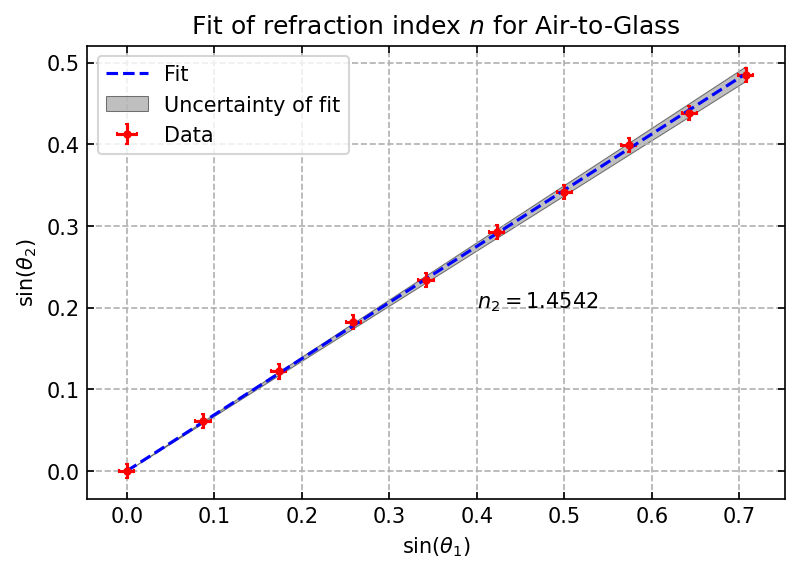

In [373]:
p_opt_atg, p_cov_atg = sp.curve_fit(n_fit, np.sin(theta1[0]), np.sin(theta2_list[0]), sigma = theta1_atg_err, absolute_sigma = True, p0 = n_guess)

fig, ax = plt.subplots()
# ax.plot(np.sin(theta1), np.sin(theta2), 'o', label='Data', color = 'tab:red')  # Plotting theta1 vs theta2
ax.errorbar(np.sin(theta1[0]), np.sin(theta2_list[0]), xerr = theta1_atg_err, yerr = theta2_atg_err, fmt = 'o', capsize=1, color='red', markersize=3, label='Data')
ax.plot(np.sin(theta1[0]), n_fit(np.sin(theta1[0]), p_opt_atg[0]), '--', color= 'blue', label='Fit')  # Plotting the fit curve

ax.fill_between(np.sin(theta1[0]), n_fit(np.sin(theta1[0]), p_opt_atg[0] - 2 * np.sqrt(p_cov_atg[0][0])), n_fit(np.sin(theta1[0]), p_opt_atg[0] + 2 * np.sqrt(p_cov_atg[0][0])), 
                color = 'grey', alpha = 0.5, edgecolor = 'k', linewidth = 0.5, label = 'Uncertainty of fit')

ax.set_xlabel(r'$\sin(\theta_1)$')
ax.set_ylabel(r'$\sin(\theta_2)$')
ax.grid(ls = '--')
ax.set_title(r'Fit of refraction index $n$ for Air-to-Glass')
ax.legend()
ax.tick_params(direction = 'in', top = True, right = True)
ax.text(0.4, 0.2, f'$n_2 = {round(p_opt_atg[0], 4)}$')

print('The index of refraction for the glass is %s plusminus %s' % (round(p_opt_atg[0], 4), round(np.sqrt(p_cov_atg[0][0]), 4)))
n_2_atg = p_opt_atg
plt.show()

GLASS TO AIR LAB DAY 3

The index of refraction for the glass is 0.9785 plusminus 0.0061


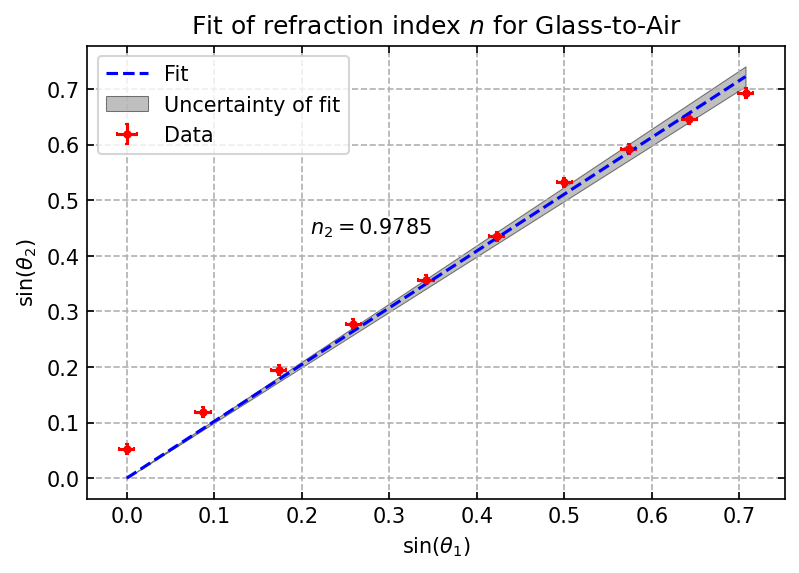

In [374]:
p_opt_gta, p_cov_gta = sp.curve_fit(n_fit, np.sin(theta1[1]), np.sin(theta2_list[1]), sigma = theta1_gta_err, absolute_sigma = True, p0 = n_guess)

fig, ax = plt.subplots()
# ax.plot(np.sin(theta1), np.sin(theta2), 'o', label='Data', color = 'tab:red')  # Plotting theta1 vs theta2
ax.errorbar(np.sin(theta1[1]), np.sin(theta2_list[1]), xerr = theta1_gta_err, yerr = theta2_gta_err, fmt = 'o', capsize=1, color='red', markersize=3, label='Data')
ax.plot(np.sin(theta1[1]), n_fit(np.sin(theta1[1]), p_opt_gta[0]), '--', color= 'blue', label='Fit')  # Plotting the fit curve

ax.fill_between(np.sin(theta1[1]), n_fit(np.sin(theta1[1]), p_opt_gta[0] - 4*np.sqrt(p_cov_gta[0][0])), n_fit(np.sin(theta1[1]), p_opt_gta[0] + 4* np.sqrt(p_cov_gta[0][0])), 
                color = 'grey', alpha = 0.5, edgecolor = 'k', linewidth = 0.5, label = 'Uncertainty of fit')

ax.set_xlabel(r'$\sin(\theta_1)$')
ax.set_ylabel(r'$\sin(\theta_2)$')
ax.grid(ls = '--')
ax.set_title(r'Fit of refraction index $n$ for Glass-to-Air')
ax.legend()
ax.tick_params(direction = 'in', top = True, right = True)
ax.text(0.21, 0.44, f'$n_2 = {round(p_opt_gta[0], 4)}$')

print('The index of refraction for the glass is %s plusminus %s' % (round(p_opt_gta[0], 4), round(np.sqrt(p_cov_gta[0][0]), 4)))
n_2_gta = p_opt_gta
plt.show()




COMPARING R+T01

In [375]:
#Get data
S_pol_L3 = np.loadtxt('S_pol_AtG_Labday_3.txt')
P_pol_L3 = np.loadtxt('P_pol_AtG_Labday_3.txt')

#Intensity of laser

#E_0_S = 5 on the day #1.8
#E_0_P = 1.25 #1.25


E_0_S = (5-0.1)/(0.94**2)
E_0_P = (1.25-0.1)/(0.94**2)

#Intensity of transmitted and reflected light
E_1_S = S_pol_L3[:, 5]
E_2_S = S_pol_L3[:, 2]

E_1_P = P_pol_L3[:, 5]
E_2_P = P_pol_L3[:, 2]

In [376]:
#Getting the small r value
r_s = E_1_S/E_0_S

r_p =E_1_P/E_0_P
r_p, r_s

(array([ 0.        ,  0.        ,  0.00768348,  0.00922017,  0.00614678,
         0.00384174,  0.00384174,  0.00076835,  0.        , -0.00768348,
        -0.01536696, -0.02305043, -0.01844035, -0.01152522,  0.00768348,
         0.03457565,  0.08451826,  0.17672   ]),
 array([0.        , 0.        , 0.02163918, 0.03426204, 0.02795061,
        0.02704898, 0.0414751 , 0.03065551, 0.04868816, 0.05049143,
        0.08475347, 0.09917959, 0.13885143, 0.19835918, 0.23442449,
        0.36065306, 0.52294694, 0.64917551]))

In [377]:
#Getting the small t value
t_s = E_2_S/E_0_S

t_p = E_2_P/E_0_P
t_p, t_s

(array([0.33038957, 0.34575652, 0.36880696, 0.35344   , 0.33807304,
        0.30733913, 0.30733913, 0.29965565, 0.27660522, 0.26123826,
        0.23050435, 0.22282087, 0.17672   , 0.14598609, 0.1075687 ,
        0.07683478, 0.03457565, 0.        ]),
 array([0.68524082, 0.73933878, 0.75737143, 0.72130612, 0.68524082,
        0.64917551, 0.59507755, 0.59507755, 0.55901224, 0.52294694,
        0.43278367, 0.43278367, 0.32458776, 0.25245714, 0.19294939,
        0.1298351 , 0.05499959, 0.00721306]))

In [378]:
#Large R value:
R_s = r_s**2

R_p= r_p**2
R_p, R_s

(array([0.00000000e+00, 0.00000000e+00, 5.90358382e-05, 8.50116070e-05,
        3.77829364e-05, 1.47589595e-05, 1.47589595e-05, 5.90358382e-07,
        0.00000000e+00, 5.90358382e-05, 2.36143353e-04, 5.31322544e-04,
        3.40046428e-04, 1.32830636e-04, 5.90358382e-05, 1.19547572e-03,
        7.14333642e-03, 3.12299584e-02]),
 array([0.        , 0.        , 0.00046825, 0.00117389, 0.00078124,
        0.00073165, 0.00172018, 0.00093976, 0.00237054, 0.00254938,
        0.00718315, 0.00983659, 0.01927972, 0.03934637, 0.05495484,
        0.13007063, 0.2734735 , 0.42142884]))

In [379]:
#Import the angles measured:
theta1_s = S_pol_L3[:, 0]
thetam_reflect_s = 360 - S_pol_L3[:, 4]
thetam_trans_s = S_pol_L3[:, 1]

theta1_p = P_pol_L3[:, 0]
thetam_reflect_p = 360 - P_pol_L3[:, 4]
thetam_trans_p = P_pol_L3[:, 1]

#convert to radians:
theta1_s = theta1_s * np.pi/180
#thetam_reflect_s = thetam_reflect_s * np.pi/180
thetam_trans_s = thetam_trans_s * np.pi/180
thetam_reflect_s = np.unwrap(thetam_reflect_s,period=np.pi) * np.pi/180
#thetam_trans_s = np.unwrap(thetam_trans_s, period=np.pi) *np.pi/180

theta1_p = theta1_p * np.pi/180
#thetam_reflect_p = thetam_reflect_p * np.pi/180
thetam_trans_p = thetam_trans_p *np.pi/180
thetam_reflect_p = np.unwrap(thetam_reflect_p,period=np.pi) * np.pi/180
#thetam_trans_p = np.unwrap(thetam_trans_p, period=np.pi) *np.pi/180

# Calculate real angle
theta2_reflect_s = theta1_s - thetam_reflect_s
theta2_trans_s = theta1_s - thetam_trans_s

theta2_reflect_p = theta1_p - thetam_reflect_p
theta2_trans_p = theta1_p - thetam_trans_p

# Uncertainties
Volt_err = S_pol_L3[:, 3] + 0.1

In [380]:
#Large T value:

T_s = (np.cos(theta2_trans_s)) / (np.cos(theta1_s)) * n_2_atg/n_2_gta * t_s**2

T_p = (np.cos(theta2_trans_p)) / (np.cos(theta1_p)) * n_2_atg/n_2_gta * t_p**2

T_s


array([6.97863879e-01, 8.13984642e-01, 8.59214027e-01, 7.87128892e-01,
       7.20591312e-01, 6.60889927e-01, 5.71066377e-01, 5.91415864e-01,
       5.47219035e-01, 5.02728816e-01, 3.71213796e-01, 4.04707543e-01,
       2.54955606e-01, 1.77818930e-01, 1.25725101e-01, 7.41525782e-02,
       1.98329329e-02, 6.99132747e-04])

In [381]:
#Check if R+T holds:
total_s = r_s + t_s

total_p = r_p + t_p
total_p, r_p, t_p

(array([0.33038957, 0.34575652, 0.37649043, 0.36266017, 0.34421983,
        0.31118087, 0.31118087, 0.300424  , 0.27660522, 0.25355478,
        0.21513739, 0.19977043, 0.15827965, 0.13446087, 0.11525217,
        0.11141043, 0.11909391, 0.17672   ]),
 array([ 0.        ,  0.        ,  0.00768348,  0.00922017,  0.00614678,
         0.00384174,  0.00384174,  0.00076835,  0.        , -0.00768348,
        -0.01536696, -0.02305043, -0.01844035, -0.01152522,  0.00768348,
         0.03457565,  0.08451826,  0.17672   ]),
 array([0.33038957, 0.34575652, 0.36880696, 0.35344   , 0.33807304,
        0.30733913, 0.30733913, 0.29965565, 0.27660522, 0.26123826,
        0.23050435, 0.22282087, 0.17672   , 0.14598609, 0.1075687 ,
        0.07683478, 0.03457565, 0.        ]))

In [382]:
# Calculating the error of T + R + d = 1


In [383]:
#Difference from 1
D_s = 1 - r_s - t_s

# Calculated the mean
mean_D_s = np.mean(D_s)

D_p = 1 - r_p - t_p
mean_D_p = np.mean(D_p)
print(f'The mean of the error for S-Polarization is {round(mean_D_s, 3)} and the one for P-Polarization is {round(mean_D_p, 3)}')


The mean of the error for S-Polarization is 0.394 and the one for P-Polarization is 0.753


In [384]:
#Brewster angle
Brewster = np.arctan(n_2_atg/n_2_gta)
#Critical angle for internal reflection
Critical = np.arcsin(1/n_2_atg)

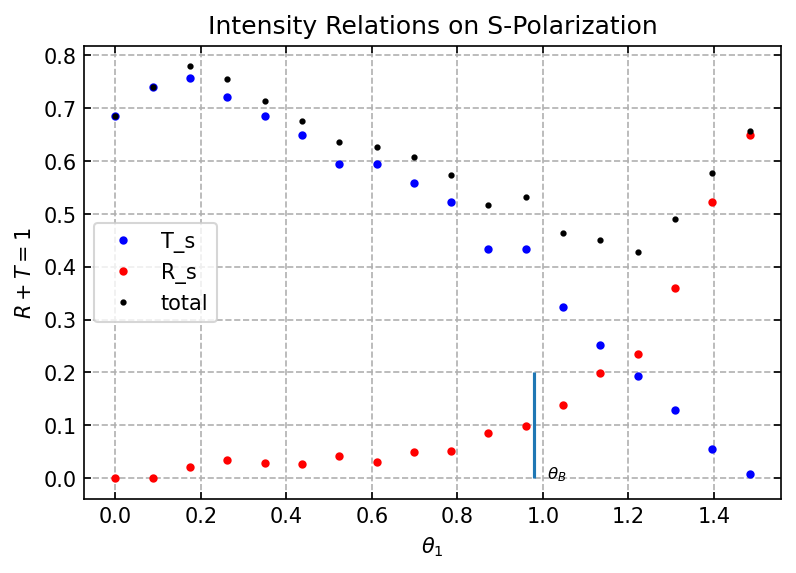

In [385]:
fig, ax = plt.subplots()

ax.plot(theta1_s, t_s, '.', color= 'blue',label = 'T_s')  # Plotting Transmitted Light
ax.plot(theta1_s, r_s, '.', color= 'red',label = 'R_s')  # Plotting Reflected Light
ax.plot(theta1_s, total_s, '.', markersize = 4, color = 'black', label = 'total') #Plotting total light measured
ax.vlines(x = Brewster, ymin=0, ymax=0.20)
# ax.vlines(x = Critical, ymin=0, ymax=20)
ax.set_xlabel(r'$\theta_1$')
ax.set_ylabel(r'$ R + T = 1 $')
ax.grid(ls = '--')
ax.set_title(r'Intensity Relations on S-Polarization')
ax.legend()
ax.tick_params(direction = 'in', top = True, right = True)
ax.text(1.01, 0.0, s=r"$\theta_{B}$", fontsize=8)
plt.show()

Text(1.01, 0.0, '$\\theta_{B}$')

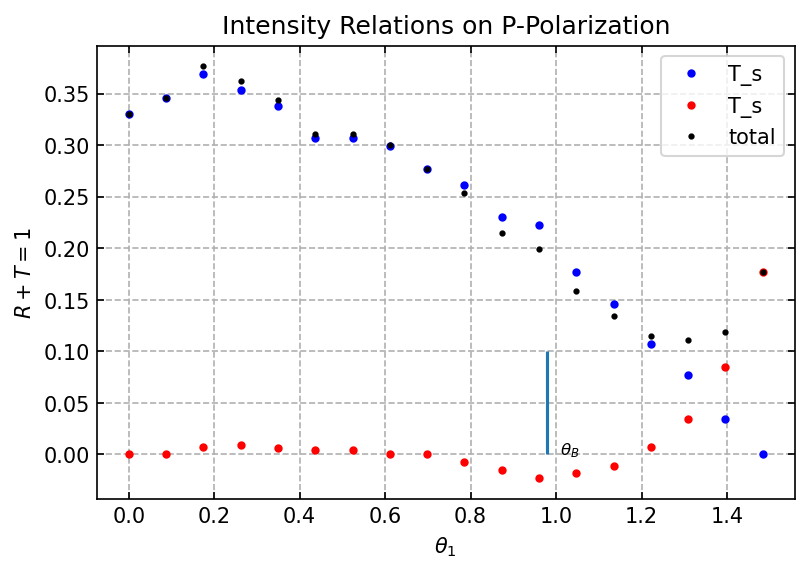

In [386]:
fig, ax = plt.subplots()

ax.plot(theta1_p, t_p, '.', color= 'blue',label = 'T_s')  # Plotting Transmitted Light
ax.plot(theta1_p, r_p, '.', color= 'red',label = 'T_s')  # Plotting Reflected Light
ax.plot(theta1_p, total_p, '.',markersize =4, color = 'black', label = 'total')
ax.vlines(x = Brewster, ymin=0, ymax=0.1)
# ax.vlines(x = Critical, ymin=0, ymax=0.1)
ax.set_xlabel(r'$\theta_1$')
ax.set_ylabel(r'$ R + T = 1 $')
ax.grid(ls = '--')
ax.set_title(r'Intensity Relations on P-Polarization')
ax.legend()
ax.tick_params(direction = 'in', top = True, right = True)
ax.text(1.01, 0.0, s=r"$\theta_{B}$", fontsize=8)

INTENSITY PLOTS AIR TO GLASS

In [387]:
# Defining all the functions for the intensity
def reflected_p(angle1, angle2):
    return np.tan(angle1 - angle2)**2 / np.tan(angle1 + angle2)**2

def reflected_s(angle1, angle2):
    return np.sin(angle1 - angle2)**2 / np.sin(angle1 + angle2)**2

def transmitted_p(angle1, angle2):
    return np.sin(2 * angle1) * np.sin(2 * angle2) / (np.sin(angle1 + angle2)**2 * np.cos(angle1 - angle2))

def transmitted_s(angle1, angle2):
    return np.sin(2 * angle1) * np.sin(2 * angle2) / np.sin(angle1 + angle2)**2

/tmp/ipykernel_826/3587821088.py:3: RuntimeWarning: invalid value encountered in divide
  return np.tan(angle1 - angle2)**2 / np.tan(angle1 + angle2)**2
/tmp/ipykernel_826/3587821088.py:6: RuntimeWarning: invalid value encountered in divide
  return np.sin(angle1 - angle2)**2 / np.sin(angle1 + angle2)**2


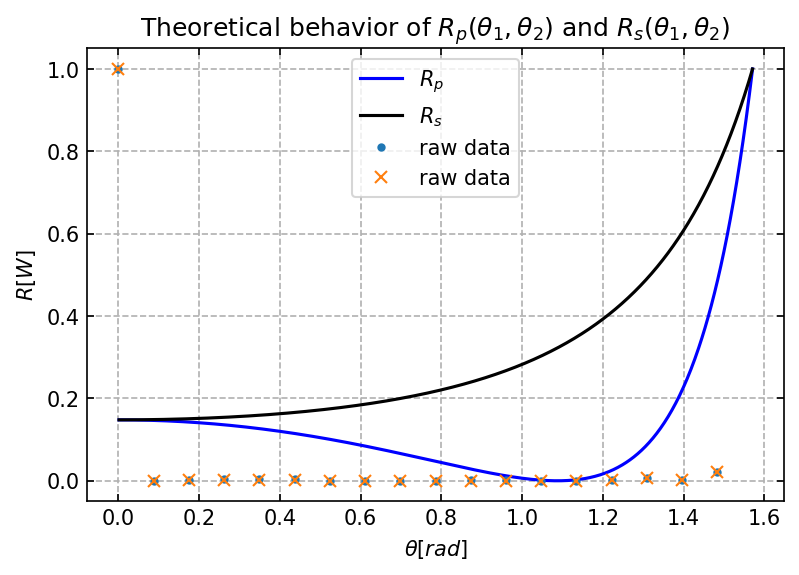

In [388]:
# Creating theoractical values for the angles
theoretical_theta1 = np.linspace(0, 90, 1000) * np.pi/180
theoretical_thetam = np.linspace(0, 50, 1000) * np.pi/180
theoretical_theta2 = theoretical_theta1 - theoretical_thetam

# Plotting reflection
plt.plot(theoretical_theta1, reflected_p(theoretical_theta1, theoretical_theta2), '-', color = 'blue', label = r'$R_p$')
plt.plot(theoretical_theta1, reflected_s(theoretical_theta1, theoretical_theta2), '-', color = 'black', label = r'$R_s$')
plt.plot(theta1_s, reflected_s(theta1_s, theta2_reflect_s), '.', label = 'raw data')
plt.plot(theta1_p, reflected_p(theta1_p, theta2_reflect_p), 'x', label = 'raw data')


# brewster = np.arctan(np.sqrt(p_cov[0][0]))
# plt.vlines(brewster, 0, 0.2)
   
# Adjust figure
plt.title(r'Theoretical behavior of $R_p(\theta_1, \theta_2)$ and $R_s(\theta_1, \theta_2)$')
plt.xlabel(r'$\theta [rad]$')
plt.ylabel(r'$R [W]$')
plt.grid(ls = '--')
plt.tick_params(direction = 'in', top = True, right = True)
plt.legend()

/tmp/ipykernel_826/3587821088.py:9: RuntimeWarning: invalid value encountered in divide
  return np.sin(2 * angle1) * np.sin(2 * angle2) / (np.sin(angle1 + angle2)**2 * np.cos(angle1 - angle2))
/tmp/ipykernel_826/3587821088.py:12: RuntimeWarning: invalid value encountered in divide
  return np.sin(2 * angle1) * np.sin(2 * angle2) / np.sin(angle1 + angle2)**2
/tmp/ipykernel_826/3587821088.py:12: RuntimeWarning: invalid value encountered in divide
  return np.sin(2 * angle1) * np.sin(2 * angle2) / np.sin(angle1 + angle2)**2
/tmp/ipykernel_826/3587821088.py:9: RuntimeWarning: invalid value encountered in divide
  return np.sin(2 * angle1) * np.sin(2 * angle2) / (np.sin(angle1 + angle2)**2 * np.cos(angle1 - angle2))


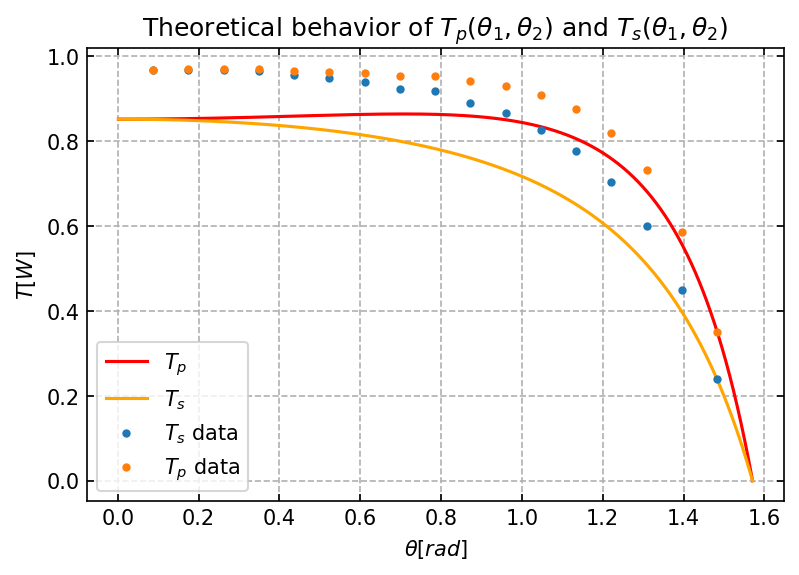

In [389]:
# Plotting transmission
plt.plot(theoretical_theta1, transmitted_p(theoretical_theta1, theoretical_theta2), '-', color = 'red', label = r'$T_p$')
plt.plot(theoretical_theta1, transmitted_s(theoretical_theta1, theoretical_theta2), '-', color = 'orange', label = r'$T_s$')
plt.plot(theta1_s, transmitted_s(theta1_s, theta2_trans_s), '.', label = "$T_s$ data")
plt.plot(theta1_p, transmitted_p(theta1_p, theta2_trans_p), '.', label = "$T_p$ data")
# brewster = np.arctan(np.sqrt(p_cov[0][0]))
# plt.vlines(brewster, 0, 0.2)
   
# Adjust figure
plt.title(r'Theoretical behavior of $T_p(\theta_1, \theta_2)$ and $T_s(\theta_1, \theta_2)$')
plt.xlabel(r'$\theta [rad]$')
plt.ylabel(r'$T [W]$')
plt.grid(ls = '--')
plt.tick_params(direction = 'in', top = True, right = True)
plt.legend()

## FINAL PLOTS

/tmp/ipykernel_826/3587821088.py:12: RuntimeWarning: invalid value encountered in divide
  return np.sin(2 * angle1) * np.sin(2 * angle2) / np.sin(angle1 + angle2)**2
/tmp/ipykernel_826/3587821088.py:6: RuntimeWarning: invalid value encountered in divide
  return np.sin(angle1 - angle2)**2 / np.sin(angle1 + angle2)**2


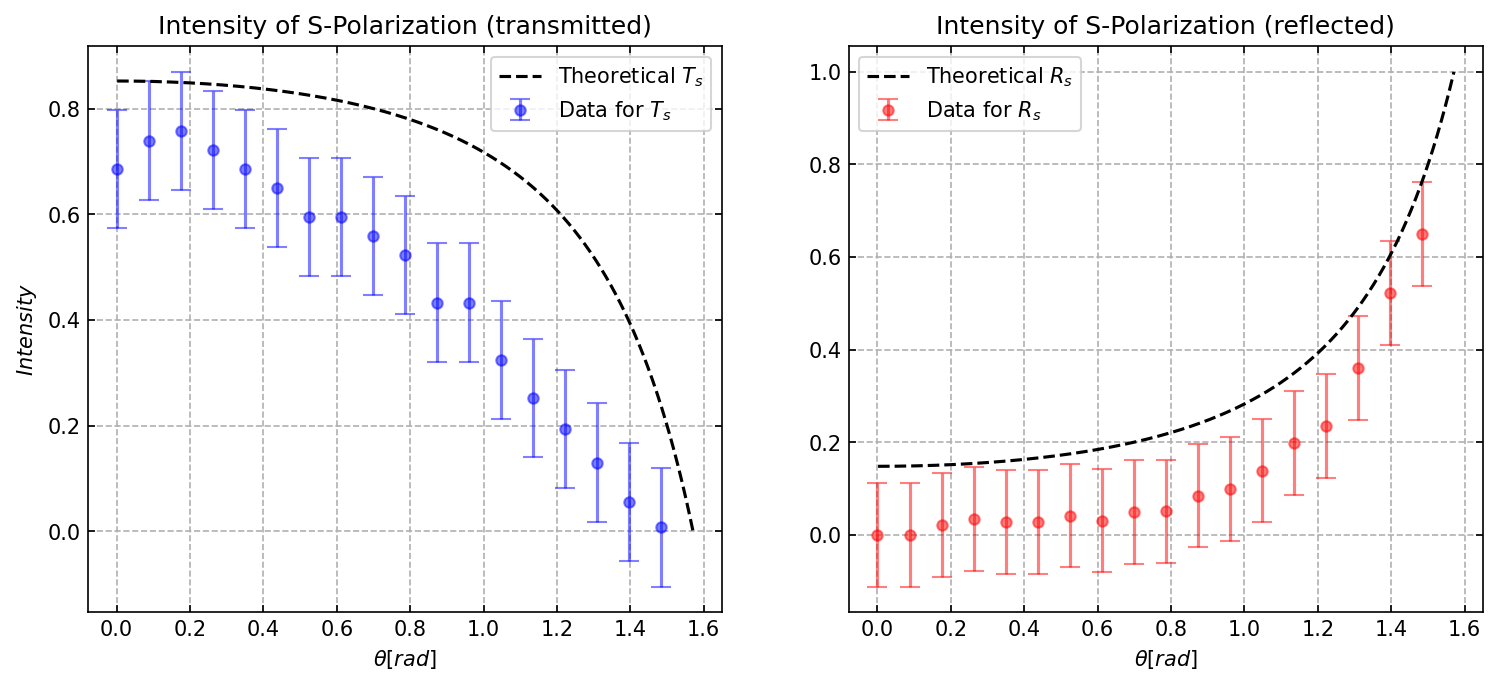

In [390]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12, 5))

# First axis object
ax1.errorbar(theta1_s, t_s, Volt_err, fmt = 'o', markersize = 5, capsize = 5, alpha = 0.5, color= 'blue',label = r'Data for $T_s$')  # Plotting Transmitted Light

# Plot theoretical
ax1.plot(theoretical_theta1, transmitted_s(theoretical_theta1, theoretical_theta2), '--', color = 'black', label = r'Theoretical $T_s$')

# ax.plot(theta1_p, total_p, '.',markersize =4, color = 'black', label = 'total')
#ax.vlines(x = Brewster, ymin=0, ymax=0.1)
# ax.vlines(x = Critical, ymin=0, ymax=0.1)
ax1.set_xlabel(r'$\theta [rad]$')
ax1.set_ylabel(r'$Intensity$')
ax1.set_title('Intensity of S-Polarization (transmitted)')
ax1.grid(ls = '--')
ax1.legend()
ax1.tick_params(direction = 'in', top = True, right = True)
# ax.text(1.01, 0.0, s = r"$\theta_{B}$", fontsize=8)

# second axis object
ax2.errorbar(theta1_s, r_s, Volt_err, fmt = 'o', markersize = 5, capsize = 5, alpha = 0.5, color= 'red',label = r'Data for $R_s$')  # Plotting Reflected Light
ax2.plot(theoretical_theta1, reflected_s(theoretical_theta1, theoretical_theta2), '--', color = 'black', label = r'Theoretical $R_s$')
ax2.set_xlabel(r'$\theta [rad]$')
ax2.set_title('Intensity of S-Polarization (reflected)')
ax2.tick_params(direction = 'in', top = True, right = True)
ax2.legend()
ax2.grid(ls = '--')

/tmp/ipykernel_826/3587821088.py:9: RuntimeWarning: invalid value encountered in divide
  return np.sin(2 * angle1) * np.sin(2 * angle2) / (np.sin(angle1 + angle2)**2 * np.cos(angle1 - angle2))
/tmp/ipykernel_826/3587821088.py:3: RuntimeWarning: invalid value encountered in divide
  return np.tan(angle1 - angle2)**2 / np.tan(angle1 + angle2)**2


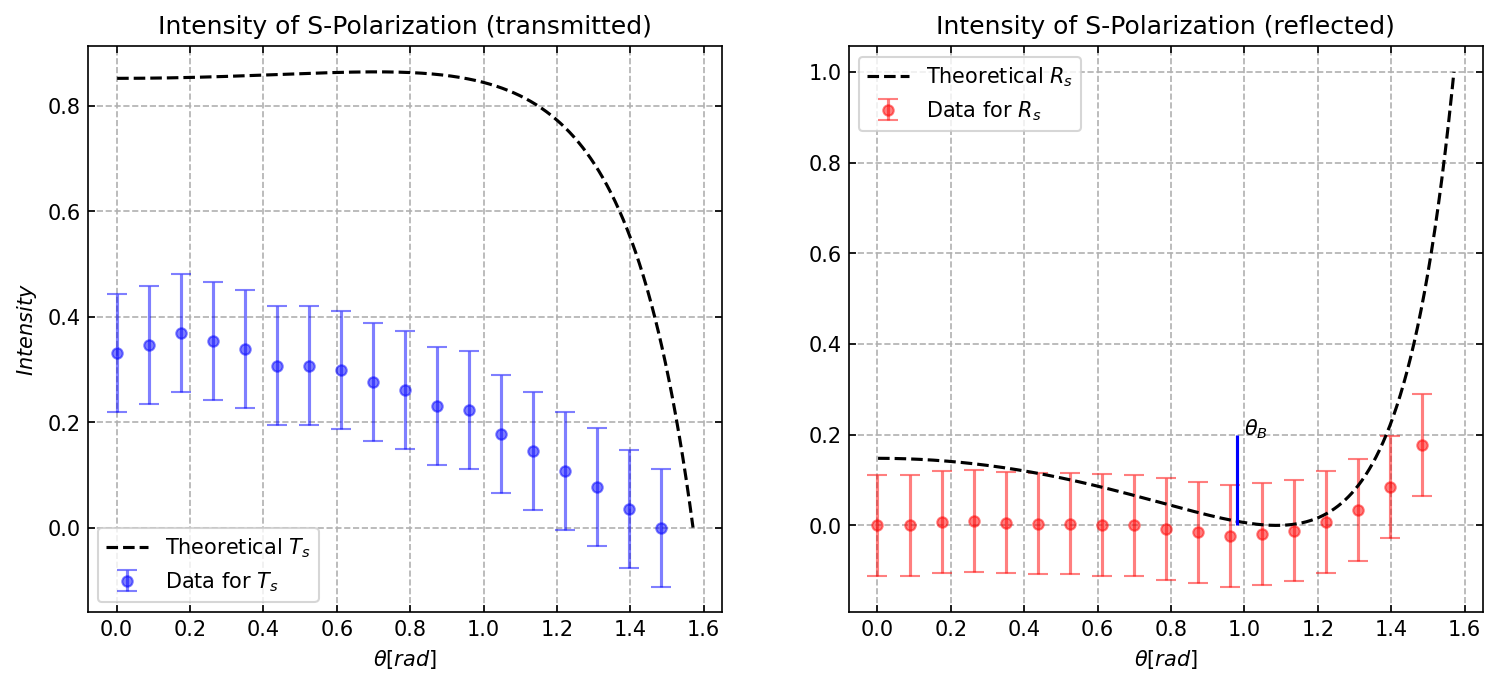

In [391]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12, 5))

# First axis object
ax1.errorbar(theta1_p, t_p, Volt_err, fmt = 'o', markersize = 5, capsize = 5, alpha = 0.5, color= 'blue',label = r'Data for $T_s$')  # Plotting Transmitted Light

# Plot theoretical
ax1.plot(theoretical_theta1, transmitted_p(theoretical_theta1, theoretical_theta2), linestyle = 'dashed', color = 'black', label = r'Theoretical $T_s$')

# ax.plot(theta1_p, total_p, '.',markersize =4, color = 'black', label = 'total')
# ax.vlines(x = Critical, ymin=0, ymax=0.1)
ax1.set_xlabel(r'$\theta [rad]$')
ax1.set_ylabel(r'$Intensity$')
ax1.set_title('Intensity of S-Polarization (transmitted)')
ax1.grid(ls = '--')
ax1.legend()
ax1.tick_params(direction = 'in', top = True, right = True)
# ax.text(1.01, 0.0, s = r"$\theta_{B}$", fontsize=8)

# second axis object
ax2.errorbar(theta1_p, r_p, Volt_err, fmt = 'o', markersize = 5, capsize = 5, alpha = 0.5, color= 'red',label = r'Data for $R_s$')  # Plotting Reflected Light
ax2.plot(theoretical_theta1, reflected_p(theoretical_theta1, theoretical_theta2), linestyle = 'dashed', color = 'black', label = r'Theoretical $R_s$')
ax2.vlines(x = Brewster, ymin=0, ymax=0.2, linestyle = '-', color = 'blue')
ax2.text(1.0, 0.2, r'$\theta_B$')
ax2.set_xlabel(r'$\theta [rad]$')
ax2.set_title('Intensity of S-Polarization (reflected)')
ax2.tick_params(direction = 'in', top = True, right = True)
ax2.legend()
ax2.grid(ls = '--')